In [1]:
#installer worldcloud et matplotlib 
!pip install wordcloud 
!pip install matplotlib

In [33]:
#Imports 
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

import ast
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
df = pd.read_csv('../cleaning_data/Final_database.csv')
df_f = df.drop_duplicates()
df_f

,adult,budget,id,imdb_id,original_language,original_title,overview,popularity,release_date,revenue,...,directors,collection_name,genres_list,countries_prod,languages_list,prod_companies,Award_mains,Mains_cat,Award_fest,Fest_cat
0,False,40000000,897087,tt15744298,en,Freelance,An ex-special forces operative takes a job to ...,2367.027,2023-10-05,8000000.0,...,['Pierre Morel'],NaN,"['Action', 'Comedy']",['United States of America'],"['English', 'Spanish']","[('Endurance Media', 'US'), ('AGC Studios', 'U...",NaN,NaN,NaN,NaN
1,False,200000000,466420,tt5537002,en,Killers of the Flower Moon,When oil is discovered in 1920s Oklahoma under...,1806.389,2023-10-18,155500000.0,...,['Martin Scorsese'],NaN,"['Crime', 'Drama', 'History']",['United States of America'],"['English', 'French', 'Latin']","[('Apple Studios', 'US'), ('Imperative Enterta...",NaN,NaN,NaN,NaN
2,False,95000000,901362,tt14362112,en,Trolls Band Together,"When Branch's brother, Floyd, is kidnapped for...",1560.713,2023-10-12,173800000.0,...,['Walt Dohrn'],The Trolls Collection,"['Animation', 'Family', 'Music', 'Fantasy', 'C...",['United States of America'],"['English', 'Lithuanian']","[('DreamWorks Animation', 'US')]",NaN,NaN,NaN,NaN
3,False,0,1075794,tt5755238,en,Leo,Jaded 74-year-old lizard Leo has been stuck in...,1303.89,2023-11-17,0.0,...,"['Robert Smigel', 'Robert Marianetti', 'David ...",NaN,"['Animation', 'Comedy', 'Family']","['Australia', 'United States of America']",['English'],"[('Happy Madison Productions', 'US'), ('Animal...",NaN,NaN,NaN,NaN
4,False,125000000,787699,tt6166392,en,Wonka,Willy Wonka – chock-full of ideas and determin...,1256.256,2023-12-06,43200000.0,...,['Paul King'],NaN,"['Comedy', 'Family', 'Fantasy']","['United Kingdom', 'United States of America']",['English'],"[('Warner Bros. Pictures', 'US'), ('Village Ro...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12012,False,0,472338,tt5534434,en,Victor Crowley,"Ten years ago, over forty people were brutally...",30.668,2017-09-12,0.0,...,['Adam Green'],Hatchet Collection,"['Comedy', 'Horror']",['United States of America'],['English'],"[('ArieScope Pictures', 'US')]",NaN,NaN,NaN,NaN
12013,False,0,605116,tt7550000,en,Project Power,"An ex-soldier, a teen and a cop collide in New...",30.55,2020-08-14,0.0,...,"['Henry Joost', 'Ariel Schulman']",NaN,"['Action', 'Crime', 'Science Fiction']",['United States of America'],"['English', 'Hindi', 'Portuguese']","[('Screen Arcade', 'US'), ('Supermarché', 'US')]",NaN,NaN,NaN,NaN
12014,False,4000000,17455,tt0337636,en,Hellraiser: Deader,"In London, after investigating crack addicted ...",30.664,2005-06-07,0.0,...,['Rick Bota'],Hellraiser Collection,"['Horror', 'Mystery', 'Thriller']","['Romania', 'United States of America']",['English'],"[('Dimension Films', 'US'), ('Stan Winston Pro...",NaN,NaN,NaN,NaN
12015,False,45000000,15045,tt0396592,en,Fat Albert,Animated character Fat Albert emerges from his...,30.536,2004-12-25,48600000.0,...,['Joel Zwick'],NaN,"['Comedy', 'Family', 'Fantasy']",['United States of America'],['English'],"[('Culver Studios', 'US'), ('20th Century Fox'...",NaN,NaN,NaN,NaN


In [34]:
df1 = df_f
#préparer notre dataset


df1 = df1.dropna(subset = ['overview'] ) #suppression des lignes où il n'y a pas de synopsis
df1['synop'] = df1['overview'].astype(str) #conversion en str de la colonne
df1['genres_list'] = df1['genres_list'].apply(ast.literal_eval) #conversion en liste de la colonne genres_list
#définition de la liste des stopwords pour le nuage des mots 

stop_words = set(stopwords.words('english'))

#Fonction qui permet de faire les nuages de mots par genre 

def nuage_mot (genre): 
    #sélection de films du genre qui nous intéresse
    genre_movies = df1[df1['genres_list'].apply(lambda x: genre in x)]
    genre_overviews = ' '.join(genre_movies['synop'])
    #tokeization 
    words = word_tokenize(genre_overviews)
    # Filtrage des stopwords
    genre_f = [word.lower() for word in words if word.isalnum() and word.lower() not in stop_words]
    # Création du WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(genre_f))
    return wordcloud

/tmp/ipykernel_26968/169419988.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['synop'] = df1['overview'].astype(str) #conversion en str de la colonne
/tmp/ipykernel_26968/169419988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['genres_list'] = df1['genres_list'].apply(ast.literal_eval) #conversion en liste de la colonne genres_list


In [29]:
drama = nuage_mot('Drama')


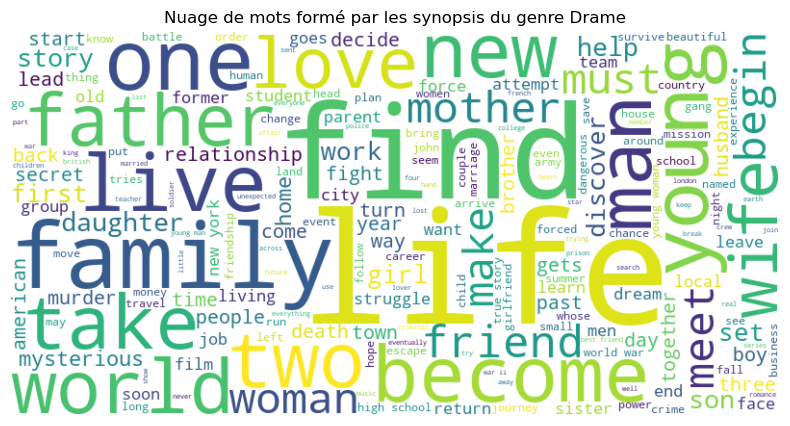

In [32]:

# Affichage du WordCloud pour le genre Drama
plt.figure(figsize=(10, 5))
plt.imshow(drama, interpolation='bilinear')
plt.axis('off')
plt.title('Nuage de mots formé par les synopsis du genre Drame')
plt.show()